In [100]:
import os.path
import matplotlib.pyplot as plt
import pickle
import numpy as np
import re
import glob

%matplotlib inline

re_debug_infos = re.compile("^.*debug_infos_a.*$")

def moving_average(data, step):
    N = len(data) - step
    res = np.zeros(N)
    for i in range(N):
        res[i] = np.mean(data[i:i+step])
    return res

def analyze_experience(exp_dir, show_episode_len=True):
    """
    plot episode len
    """
    print exp_dir
    episode_len_fn = exp_dir + "/episode_len.p"
    if show_episode_len and os.path.isfile(episode_len_fn):
        episode_len = pickle.load(open(episode_len_fn, "r"))
        plt.figure(figsize=(15,15))
        for i, agent in enumerate(episode_len.T):
            plt.plot(moving_average(agent, 100), label='agent '+str(i))
        plt.legend()
        plt.title("episode len " + exp_dir)
        plt.show()

def analyze_batch(exp_dir):
    print exp_dir
    batch_files = glob.glob(exp_dir + "/debug_infos_a*")
    print batch_files[-1]
    a, X, R, mask, X_b, b = pickle.load(open(batch_files[-1], "r"))
    
    def imshow(data, title):
        plt.figure(figsize=(20,20))
        im = plt.imshow(data)#, label='agent '+str(i))
        plt.colorbar(im,fraction=0.006, pad=0.04)
        plt.title(title + exp_dir)
        plt.show()
    end = 12
    i=0
    imshow((R)[:end], "return")
    imshow((b)[:end], "baseline")
    imshow(((R-b)*((R-b)>0).astype(np.int32)*mask)[:end], "advantage >0")
    imshow(((R-b)*((R-b)<0).astype(np.int32)*mask)[:end], "advantage <0")

    imshow(mask[:end], "mask")
    imshow(X_b[i].T, "X_b")
    print "X_b",X_b[i,:end,:].T
    print "mask",mask[i,:end].T

    print "R",R[i,:end].T
    print "b",b[i,:end].T


res_tom_ep/ddddddd_n_landmarks-2_experience_memory-5000_bs-128_n_agents-1_n_iter_per_train-30_algo-rpg_baseline_rec_freq_train-500_lr-0.001_n_hidden-8_gamma-1.0_max_episode_len-50_
res_tom_ep/ddddddd_n_landmarks-2_experience_memory-5000_bs-128_n_agents-1_n_iter_per_train-30_algo-rpg_baseline_rec_freq_train-500_lr-0.001_n_hidden-8_gamma-1.0_max_episode_len-50_
res_tom_ep/ddddddd_n_landmarks-2_experience_memory-5000_bs-128_n_agents-1_n_iter_per_train-30_algo-rpg_baseline_rec_freq_train-500_lr-0.001_n_hidden-8_gamma-1.0_max_episode_len-50_
res_tom_ep/ddddddd_n_landmarks-2_experience_memory-5000_bs-128_n_agents-1_n_iter_per_train-30_algo-rpg_baseline_rec_freq_train-500_lr-0.001_n_hidden-8_gamma-1.0_max_episode_len-50_/debug_infos_a0_e2000.p.p


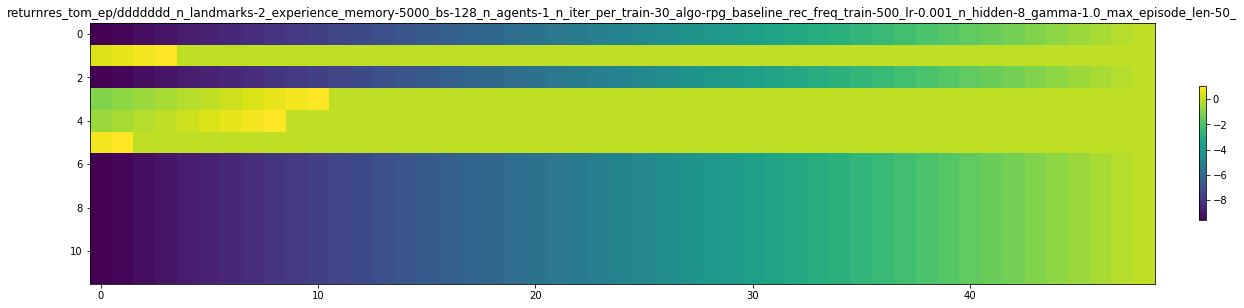

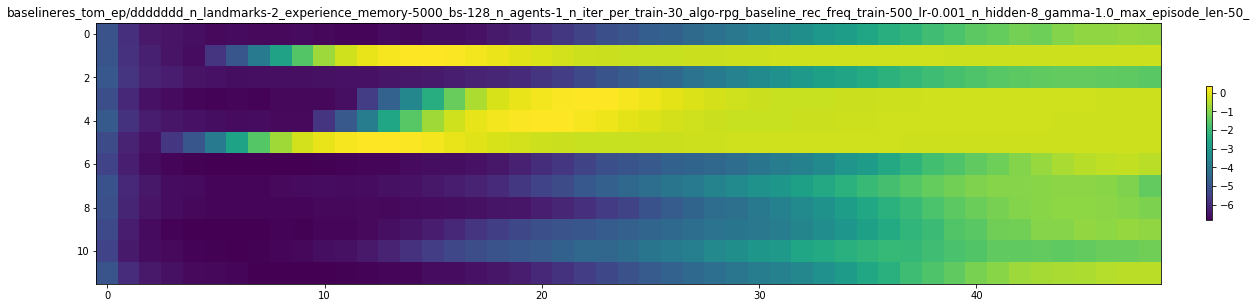

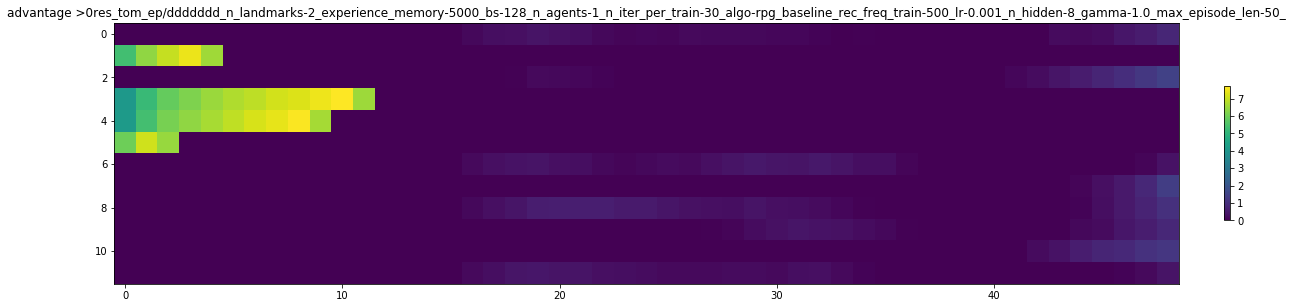

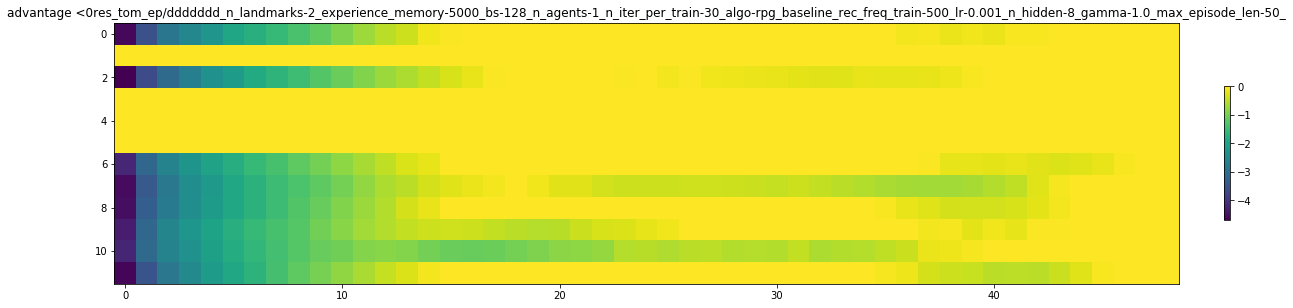

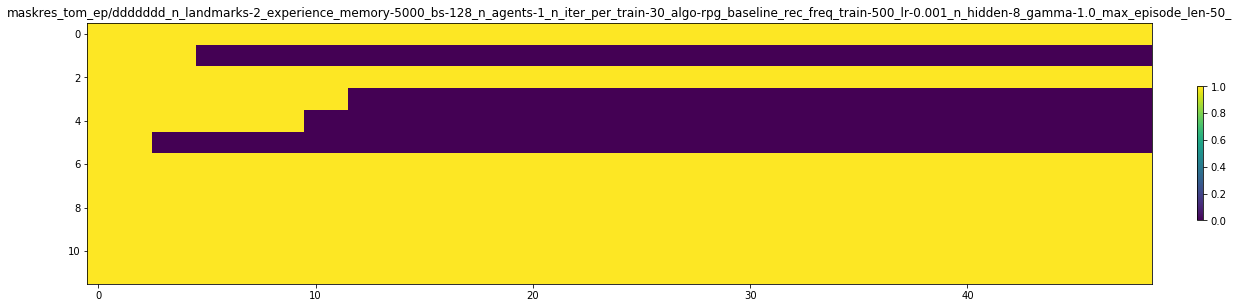

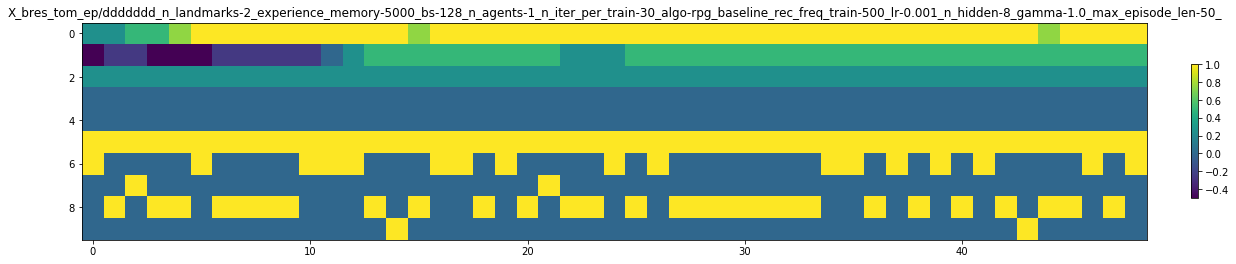

X_b [[ 0.25  0.25  0.5   0.5   0.75  1.    1.    1.    1.    1.    1.    1.  ]
 [-0.5  -0.25 -0.25 -0.5  -0.5  -0.5  -0.25 -0.25 -0.25 -0.25 -0.25  0.  ]
 [ 0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25  0.25]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.  ]
 [ 1.    0.    0.    0.    0.    1.    0.    0.    0.    0.    1.    1.  ]
 [ 0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    1.    0.    1.    1.    0.    1.    1.    1.    1.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]]
mask [1 1 1 1 1 1 1 1 1 1 1 1]
R [-9.6 -9.4 -9.2 -9.  -8.8 -8.6 -8.4 -8.2 -8.  -7.8 -7.6 -7.4]
b [-4.99776615 -5.86564702 -6.34387244 -6.46888467 -6.54589345 -6.65769513
 -6.64731467 -6.65136565 -6.65052862 -6.64423739 -6.69445413 -6.70522415]


In [105]:
import re
pattern = re.compile("^.*ddd.*_$")

results_dir = "res_tom_ep"
experience_dirs = [results_dir + "/" + d for d in os.listdir(results_dir) if os.path.isdir(os.path.join(results_dir, d))]

for exp_dir in experience_dirs:
    if pattern.match(exp_dir):
        print exp_dir
        analyze_experience(exp_dir)
        analyze_batch(exp_dir)
    

In [103]:
results_dir = "res"
experience_dirs = [results_dir + "/" + d for d in os.listdir(results_dir) if os.path.isdir(os.path.join(results_dir, d))]

for exp_dir in experience_dirs:
    analyze_batch(exp_dir)



OSError: [Errno 2] No such file or directory: 'res'